# Divide by Gaussian

When processing images with membrane staining it sometimes happens that the intensity of the membranes is not homogeneous and changes locally. This intensity variation may impair cell segmentation algorithms. In these cases it may make sense to homogenize the intensity by dividing the image by a Gaussian blurred version of itself.

In [1]:
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
from skimage.filters import gaussian

In this image you see that the intensity of the membranes decreases from top to bottom.

cl.OCLArray([[15516., 16706., 10227., ...,  2777.,  2855.,  2783.],
       [16803., 16311.,  9807., ...,  2795.,  2744.,  2721.],
       [13111., 15255.,  9477., ...,  3006.,  3027.,  2698.],
       ...,
       [ 2405.,  2826.,  3144., ...,  2060.,  1959.,  1762.],
       [ 3175.,  3318.,  3200., ...,  1841.,  2054.,  1913.],
       [ 3099.,  3301.,  3012., ...,  1965.,  2374.,  2446.]],
      dtype=float32)
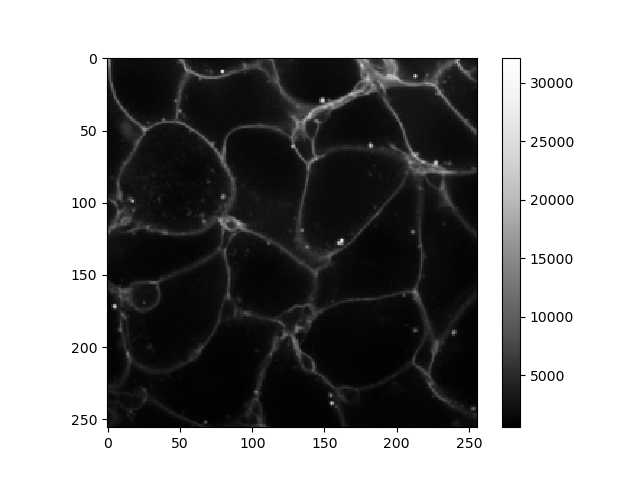
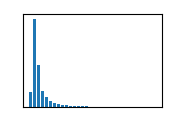

In [2]:
image = imread('../../data/membranes_2d.tif')
cle.asarray(image)

This intensity gradient can be removed by dividing the image by its background, a Gaussian blurred version of it self.

cl.OCLArray([[1.8295711 , 2.0727317 , 1.3400825 , ..., 0.63890284, 0.6729534 ,
        0.6717435 ],
       [2.0299954 , 2.0725877 , 1.3155018 , ..., 0.63900983, 0.6421698 ,
        0.6515172 ],
       [1.6262667 , 1.9892585 , 1.3039397 , ..., 0.6835915 , 0.7039906 ,
        0.6414088 ],
       ...,
       [0.98931336, 1.1786715 , 1.3311533 , ..., 0.8870197 , 0.8390279 ,
        0.7511131 ],
       [1.3044561 , 1.3835748 , 1.3560139 , ..., 0.79402256, 0.88066417,
        0.8159115 ],
       [1.271311  , 1.3758018 , 1.2770755 , ..., 0.84971267, 1.0200088 ,
        1.0449218 ]], dtype=float32)
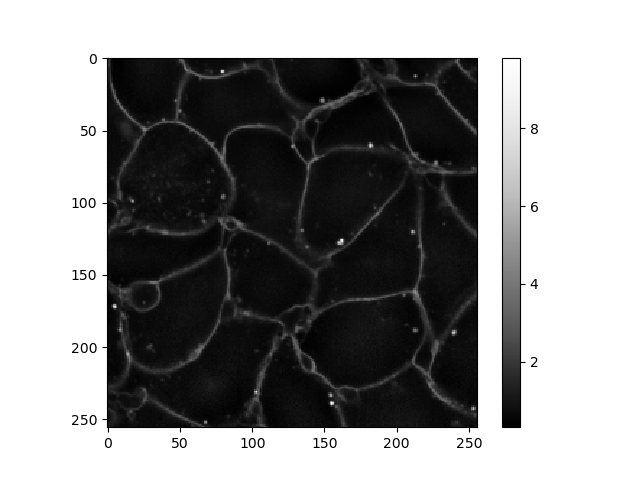
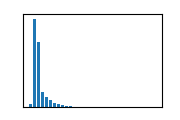

In [3]:
intensity_equivalized = cle.divide_by_gaussian_background(image, sigma_x=10, sigma_y=10)
intensity_equivalized

## How it works
To demonstrate how it works, we will do the same operation using two steps using scikit-image and numpy.

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


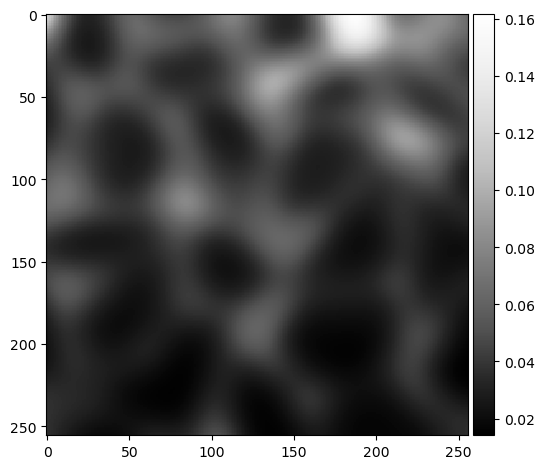

In [4]:
background = gaussian(image, sigma=10)
imshow(background, cmap="Greys_r")

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


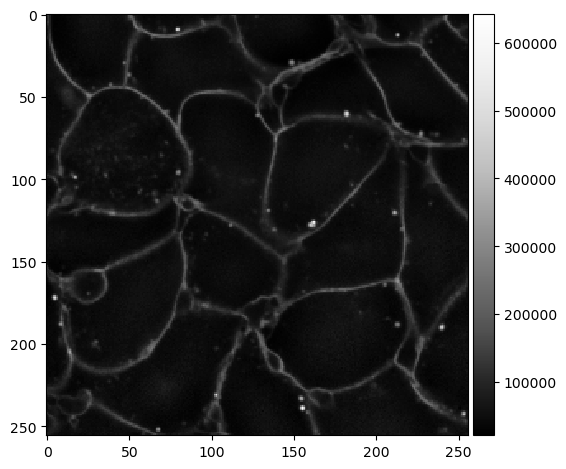

In [5]:
result = image / background
imshow(result, cmap="Greys_r")